In [2]:
import pandas as pd

# GOAL: visualise total sales by region sorted high to low
wholesale = pd.read_csv('wholesale-customers.csv')
wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
wholesale.columns = wholesale.columns.str.lower()
wholesale.columns

Index(['channel', 'region', 'fresh', 'milk', 'grocery', 'frozen',
       'detergents_paper', 'delicassen'],
      dtype='object')

In [3]:
wholesale_unpivot = pd.melt(frame=wholesale, id_vars = 'region', 
        value_vars=wholesale.drop(['channel', 'region'], axis='columns'), 
                          value_name='sales', var_name='department')

wholesale_unpivot.head()

,region,department,sales
0,3,fresh,12669
1,3,fresh,7057
2,3,fresh,6353
3,3,fresh,13265
4,3,fresh,22615


In [4]:
region_sales = wholesale_unpivot.groupby('region').sum('sales')
region_sales

,sales
region,
1,2386813
2,1555088
3,10677599


In [5]:
region_sales.sort_values(by='sales', inplace=True)
region_sales

,sales
region,
2,1555088
1,2386813
3,10677599


<AxesSubplot:title={'center':'Total sales by region'}, ylabel='region'>

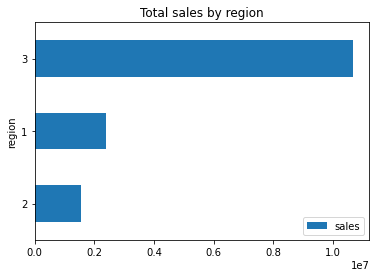

In [6]:
region_sales.plot(kind='barh', title='Total sales by region')